In [1]:
import pandas as pd
dataset = pd.read_csv("./dataset - 2020-09-24.csv")

In [2]:
dataset.columns

Index(['Name', 'Jersey Number', 'Club', 'Position', 'Nationality', 'Age',
       'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target',
       'Shooting accuracy %', 'Hit woodwork', 'Big chances missed',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
       'Duels lost', 'Successful 50/50s', 'Aerial battles won',
       'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
       'Passes', 'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow 

In [3]:
dataset['Hit woodwork']

0      NaN
1      NaN
2      NaN
3      3.0
4      0.0
      ... 
566    0.0
567    7.0
568    2.0
569    0.0
570    0.0
Name: Hit woodwork, Length: 571, dtype: float64

In [4]:
#Converting Positions to numbers
dataset.Position[dataset.Position == 'Goalkeeper'] = 0
dataset.Position[dataset.Position == 'Defender'] = 1
dataset.Position[dataset.Position == 'Midfielder'] = 2
dataset.Position[dataset.Position == 'Forward'] = 3

#Converting empty cells to 0
dataset['Shots'] = dataset['Shots'].fillna(0)
dataset['Shots on target'] = dataset['Shots on target'].fillna(0)
dataset['Hit woodwork'] = dataset['Hit woodwork'].fillna(0)
dataset['Offsides'] = dataset['Offsides'].fillna(0)

#Converting Clubs to numbers
dataset.Club[dataset.Club == 'Arsenal'] = 8
dataset.Club[dataset.Club == 'Aston-Villa'] = 11
dataset.Club[dataset.Club == 'Brighton-and-Hove-Albion'] = 16
dataset.Club[dataset.Club == 'Burnley'] = 17
dataset.Club[dataset.Club == 'Chelsea'] = 4
dataset.Club[dataset.Club == 'Crystal-Palace'] = 14
dataset.Club[dataset.Club == 'Everton'] = 10
dataset.Club[dataset.Club == 'Fulham'] = 18
dataset.Club[dataset.Club == 'Leeds-United'] = 9
dataset.Club[dataset.Club == 'Leicester-City'] = 5
dataset.Club[dataset.Club == 'Liverpool'] = 3
dataset.Club[dataset.Club == 'Manchester-City'] = 1
dataset.Club[dataset.Club == 'Manchester-United'] = 2
dataset.Club[dataset.Club == 'Newcastle-United'] = 12
dataset.Club[dataset.Club == 'Sheffield-United'] = 20
dataset.Club[dataset.Club == 'Southampton'] = 15
dataset.Club[dataset.Club == 'Tottenham-Hotspur'] = 7
dataset.Club[dataset.Club == 'West-Bromwich-Albion'] = 19
dataset.Club[dataset.Club == 'West-Ham-United'] = 6
dataset.Club[dataset.Club == 'Wolverhampton-Wanderers'] = 13

/var/folders/g4/vjl4gjkx3z9038wmy9rj_z3r0000gn/T/ipykernel_92506/1654668495.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Position[dataset.Position == 'Goalkeeper'] = 0
/var/folders/g4/vjl4gjkx3z9038wmy9rj_z3r0000gn/T/ipykernel_92506/1654668495.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Position[dataset.Position == 'Defender'] = 1
/var/folders/g4/vjl4gjkx3z9038wmy9rj_z3r0000gn/T/ipykernel_92506/1654668495.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [5]:
dataset['Hit woodwork']

0      0.0
1      0.0
2      0.0
3      3.0
4      0.0
      ... 
566    0.0
567    7.0
568    2.0
569    0.0
570    0.0
Name: Hit woodwork, Length: 571, dtype: float64

<AxesSubplot:>

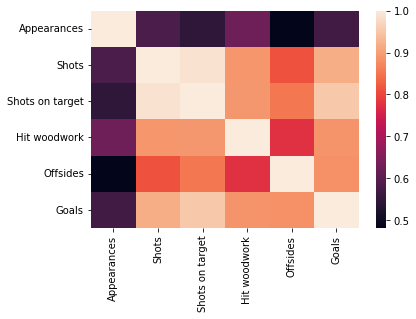

In [15]:
import seaborn as sns
sns.heatmap(dataset[['Appearances', 'Shots', 'Shots on target', 'Hit woodwork', 'Offsides', 'Goals']].corr())

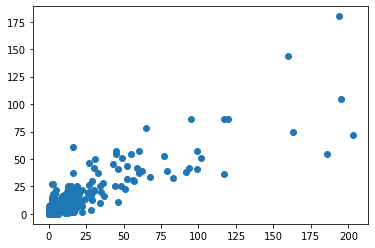

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(dataset['Offsides'], dataset['Goals'])

In [8]:
x = dataset[['Appearances', 'Shots', 'Shots on target', 'Hit woodwork', 'Offsides']]
target = dataset[['Goals']]

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, target_train, target_test = train_test_split(x, target, test_size=0.3, random_state=101)

In [10]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, target_train)
predictions = lm.predict(x_test)

In [11]:
print(lm .intercept_)

[-0.25199884]


In [12]:
lm.coef_

array([[ 0.02380541, -0.09130583,  0.43700558,  0.4792103 ,  0.12479319]])

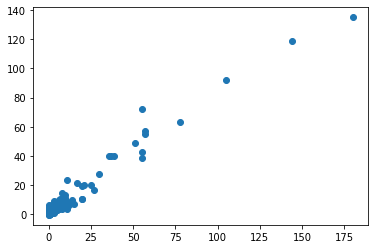

In [13]:
plt.scatter(target_test, predictions)

In [14]:
from sklearn import metrics
metrics.mean_absolute_error(target_test, predictions)

2.3588526091499356